# Probability Distributions
Many standard statistical models operate under the assumption that your dataset takes on a certain distribution, such a Gaussian (normal). The probability distribution describes the array of all possible outcomes that a random variable can take, along with the probability of each possibility. Depending on the random variable and the situation, a number of different distributions are possible. 

![winter](./winter.jpeg)


## Discrete vs Continuous Random Variables
The methods we can use for calculating probability are determined by whether a variable is continuous or discrete. 

If we blindly pick a random variable X from our dataset, the possible values for X can be described as discrete if X can only take on a certain number of distinct values, such as in a coin flip where X can only equal heads or tails, and continuous if X can take on an infinite number of possible values, such as weight or height. 

![prob_dist](./probabilty_dist.png)

The diagram above shows the probablity densities for some of the most common distirubtions. The horizontal (X) axis in each box is the set of possible numeric outcomes. The vertical (Y) axis describes the probability of outcomes. 

Discrete distributions are mostly portrayed at the top of the chart, where the line height represents the probability of that outcome, while the bottom half represents continuous distributions as a curve, with each possible outcome falling somewhere in the area below the curve. 

### Discrete Distributions
If X is discrete and can only take on a limited set of values, then we can calculate the probility that X is either heads or tails, called it's **probability mass function**. Examples of these types of distributions are Bernoulli, Binomial and Poisson. 
- `disrete_X = ["heads", "tails"]`
- `P(X) = 1/2`

### Continuous Distributions
For a continuous X, the probability that X can belong to any particular range of values is known as it's **probability density function**. Rather than trying to determine the probability that X is equal to a specific value, we are interested in the probability that X falls in the range of real numbers. 
- `continuous_X = ∞`  
- `P(X=x) = 0` Because X can take on any, or all, real values, then there is a set of infinite possible values 

Even though we cannot calculate the probability that X equals a particular random number, we can calculate the probability that a value, k, lies within the range of X, by calculating the probability density function for X, and determining if k falls in the area under the curve. 
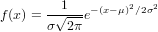
Where:
- μ (mu) is the population mean
- σ (sigma) is the standard deviation
- σ2 is the variance

![standard_dist](standard_dist.png)

We can see above that on the y axis, any output value from a probability density function is greater than or equal to zero, and less than 1. 

## Standard Normal Distribution (aka Gaussian)
The most famous, and most widely used, probability distribution function is the Gaussian, or standard normal, distribution. 

A Gaussian distribution has the following properties: 
- Mean = 0
- Standard deviation = 1

### Central Limit Theroum
One of the reasons this distribution is used as the gold standard is due to the Central Limit Theorum- with a large enough sample size, sample means become normally distributed (mean = 0, std dev = 1). This provides us with a baseline we can use to determine what is a reasonable expected range for the value of k. 

Basically, we have observed that no matter what kind of distribution you have, if you draw groups of random samples from that distribution, their means will be normally distributed. How cool is that? 

For example, if you randomly picked 10 people out of 100 and recorded their heights, the average of those 10 heights would be the sample mean. If you did this enough times, plotting the means as you go along, you would see that with each draw, the distribution becomes roughly normal. 

### CLT with dice
A standard die is a cube with six possible outcomes ranging from 1 to 6, with the probability of rolling any one number 1/6. The distribution of the numbers that turn up from a dice roll is uniform given the equal likelihood. 

We'll use numpy's randint() function to simulate 50 dice rolls and landing on a randome number between 1 and 6: 

In [8]:
from numpy.random import randint
import numpy as np
from matplotlib import pyplot as plt

# generate a sample of die rolls
rolls = randint(1, 7, 50)
rolls

array([6, 1, 3, 4, 2, 4, 5, 3, 6, 3, 2, 1, 5, 3, 4, 6, 5, 5, 1, 2, 2, 1,
       4, 1, 3, 4, 1, 5, 5, 5, 3, 2, 3, 2, 6, 2, 1, 1, 2, 3, 6, 6, 1, 1,
       2, 4, 5, 4, 1, 2])

Now let's view the mean at 50 rolls: 

In [10]:
print(np.mean(rolls))

3.18


We know that the expected mean for this distribution can be calculated as the sum of each die divided by total possiblities:

In [11]:
(1 + 2 + 3 + 4 + 5 + 6) / 6 

3.5

Which is different than our sampled mean, as expected, because it's estimating the population mean from our random draws. 

#### 1000 samples

Let's grab 100 samples of 50 and see how that impacts our distribution and mean: 

In [23]:
means_100 = [np.mean(randint(1, 7, 50)) for _ in range(100)]

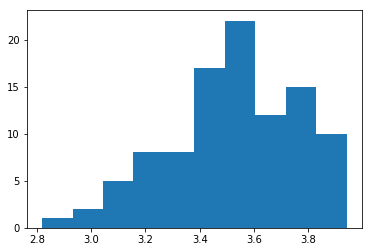

In [24]:
# plot the distribution of sample means
plt.hist(means_100)
plt.show()

In [25]:
np.mean(means_100)

3.5174000000000003

#### 1000 samples
Let's try it again with 1000 samples: 

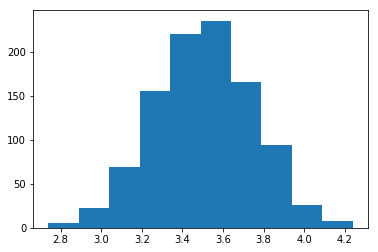

In [28]:
means_1000 = [np.mean(randint(1, 7, 50)) for _ in range(1000)]
# plot the distribution of sample means
plt.hist(means_1000)
plt.show()

In [27]:
np.mean(means_1000)

3.50622

Ta da! 

## Why is this important? 
At the heart of the matter, each analysis we're doing is a hypothesis test. We are setting out to determine the likelihood that the data you have is actually determining something beyond what you'd exepct to see by random chance. 

To test our hypothesis, we can use the CLT to create a **null distribution**, the distribution that we would expect to see if our hypothesis is wrong. For example, in the sceario above, we were able to calculate the distribution of dice rolls we can expect to see by random chance. 

![bell_curve](./bell_curve.jpg)

Using the CLT, we know that with a large enough sample size, the mean of this distribution will be roughly 0, and the standard deviation will be roughly 1. So if our randome variable has a standard deviation greater than 1, we know that the likelihood of it occurring is outside the realm of what we would expect to see by chance. 